In [9]:
import numpy as np
import os
from abb_parser import TROBParser
from visualizer import CameraPoseVisualizer

np.set_printoptions(precision=3, suppress=True)

root = str(globals()['_dh'][0])
root

'/Users/ozgucbertugcapunaman/Documents/GitHub/MycoRobo3D-DIC/utilities'

In [10]:
parser = TROBParser(dir=root, parsing_method='movel')

-------------------
Extrinsic Calibration:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
-------------------


In [11]:
Ts = np.asarray(parser.base_T_tcp(export=False)['H'])
Ts

array([[[   0.   ,   -1.   ,    0.   ,  803.799],
        [  -1.   ,    0.   ,   -0.   ,   38.058],
        [   0.   ,    0.   ,   -1.   , 1245.097],
        [   0.   ,    0.   ,    0.   ,    1.   ]],

       [[   0.   ,   -1.   ,    0.   ,  823.799],
        [  -1.   ,    0.   ,   -0.   ,   38.058],
        [   0.   ,    0.   ,   -1.   , 1245.097],
        [   0.   ,    0.   ,    0.   ,    1.   ]],

       [[   0.   ,   -1.   ,    0.   ,  823.799],
        [  -1.   ,    0.   ,   -0.   ,   58.058],
        [   0.   ,    0.   ,   -1.   , 1245.097],
        [   0.   ,    0.   ,    0.   ,    1.   ]],

       [[   0.   ,   -1.   ,    0.   ,  803.799],
        [  -1.   ,    0.   ,   -0.   ,   58.058],
        [   0.   ,    0.   ,   -1.   , 1245.097],
        [   0.   ,    0.   ,    0.   ,    1.   ]],

       [[   1.   ,    0.   ,    0.   ,  813.799],
        [   0.   ,   -0.866,   -0.5  ,  298.058],
        [   0.   ,    0.5  ,   -0.866, 1213.523],
        [   0.   ,    0.   ,    0.   ,    

In [12]:
# Normalize all poses: T_normalized = inv(T0) * T_i for each pose T_i
Ts_norm = np.array([np.linalg.inv(Ts[0]) @ T for T in Ts])
Ts_norm

array([[[   1.   ,    0.   ,    0.   ,    0.   ],
        [   0.   ,    1.   ,    0.   ,    0.   ],
        [   0.   ,    0.   ,    1.   ,    0.   ],
        [   0.   ,    0.   ,    0.   ,    1.   ]],

       [[   1.   ,    0.   ,    0.   ,    0.   ],
        [   0.   ,    1.   ,    0.   ,  -20.   ],
        [   0.   ,    0.   ,    1.   ,    0.   ],
        [   0.   ,    0.   ,    0.   ,    1.   ]],

       [[   1.   ,    0.   ,    0.   ,  -20.   ],
        [   0.   ,    1.   ,    0.   ,  -20.   ],
        [   0.   ,    0.   ,    1.   ,    0.   ],
        [   0.   ,    0.   ,    0.   ,    1.   ]],

       [[   1.   ,    0.   ,    0.   ,  -20.   ],
        [   0.   ,    1.   ,    0.   ,    0.   ],
        [   0.   ,    0.   ,    1.   ,    0.   ],
        [   0.   ,    0.   ,    0.   ,    1.   ]],

       [[   0.   ,    0.866,    0.5  , -260.   ],
        [  -1.   ,    0.   ,    0.   ,  -10.   ],
        [   0.   ,   -0.5  ,    0.866,   31.574],
        [   0.   ,    0.   ,    0.   ,    

In [13]:
out_dir = '/out'

os.mkdir(root+out_dir)

np.save(root+out_dir+'/transforms_all.npy', Ts, allow_pickle=False)
np.save(root+out_dir+'/transforms_all_normalized.npy', Ts_norm, allow_pickle=False)
np.save(root+out_dir+'/transforms.npy', Ts[:4], allow_pickle=False)
np.save(root+out_dir+'/transforms_normalized.npy', Ts_norm[:4], allow_pickle=False)

Initialized CameraPoseVisualizer


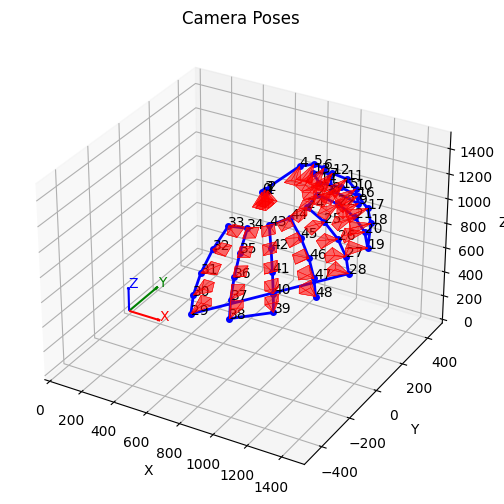

In [14]:
visualizer = CameraPoseVisualizer(xlim=[0, 1500], ylim=[-500, 500], zlim=[0, 1500], xyz_axes_length=200)

for i in range(len(Ts)):
    pose = Ts[i]
    
    visualizer.extrinsic2pyramid(pose, 'r', 100)

visualizer.show()